# Visualization

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from joypy import joyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [12]:
data = pd.read_csv('results/synth_table_av_moy_anthr.csv', sep=';')

# Clean column names (remove spaces and special characters)
data.columns = data.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Convert relevant columns to numeric
numeric_cols = ['ampl', 'f_max', 'sym_max', 'slope_pre', 'slope_post'] + \
               [f'mean_{b}' for b in range(500, 5500, 500)]
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert categorical variables
categorical_cols = ['side', 'sex', 'environment_exposition', 'Biotope', 'Exposition', 'Language']
for col in categorical_cols:
    data[col] = data[col].astype('category')

# Create age groups
data['age_group'] = pd.cut(data['age'], 
                          bins=[18, 25, 35, 45, 55],
                          labels=['18-25', '25-35', '35-45', '45-55'])

data_left = data[data['side'] == 'L'].copy()
data_right = data[data['side'] == 'R'].copy()



data['Environment'] = data['environment_exposition'].astype(str) + ' - ' + data['environment_biotope'].astype(str)

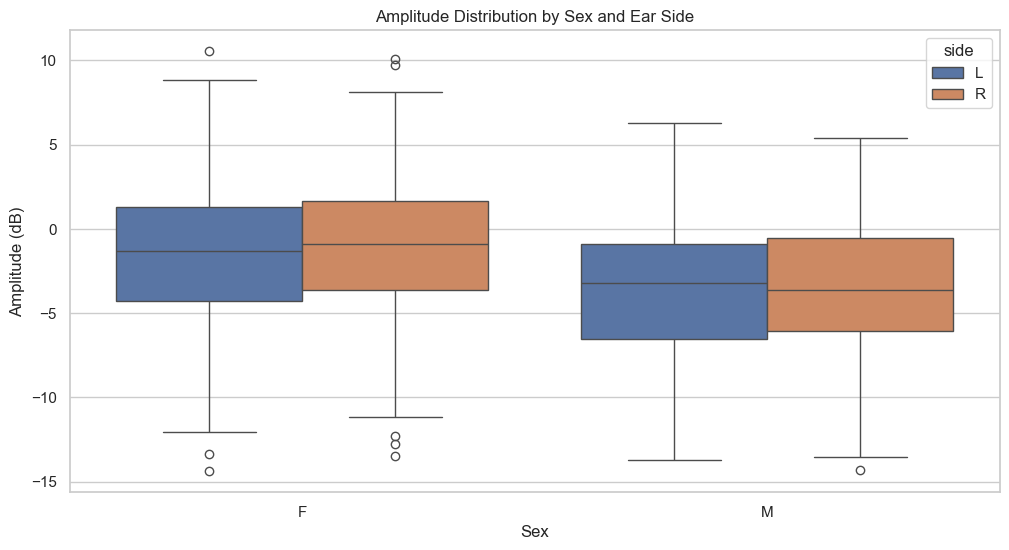

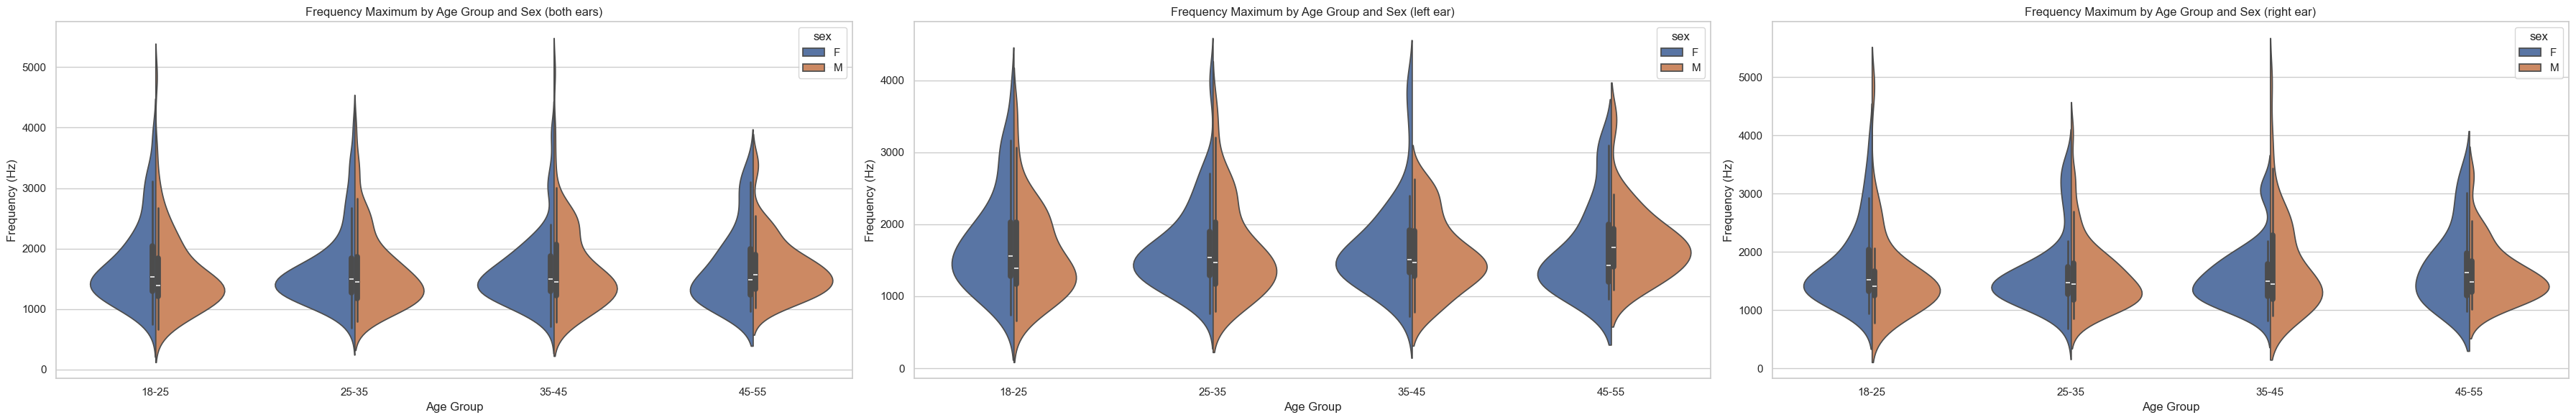

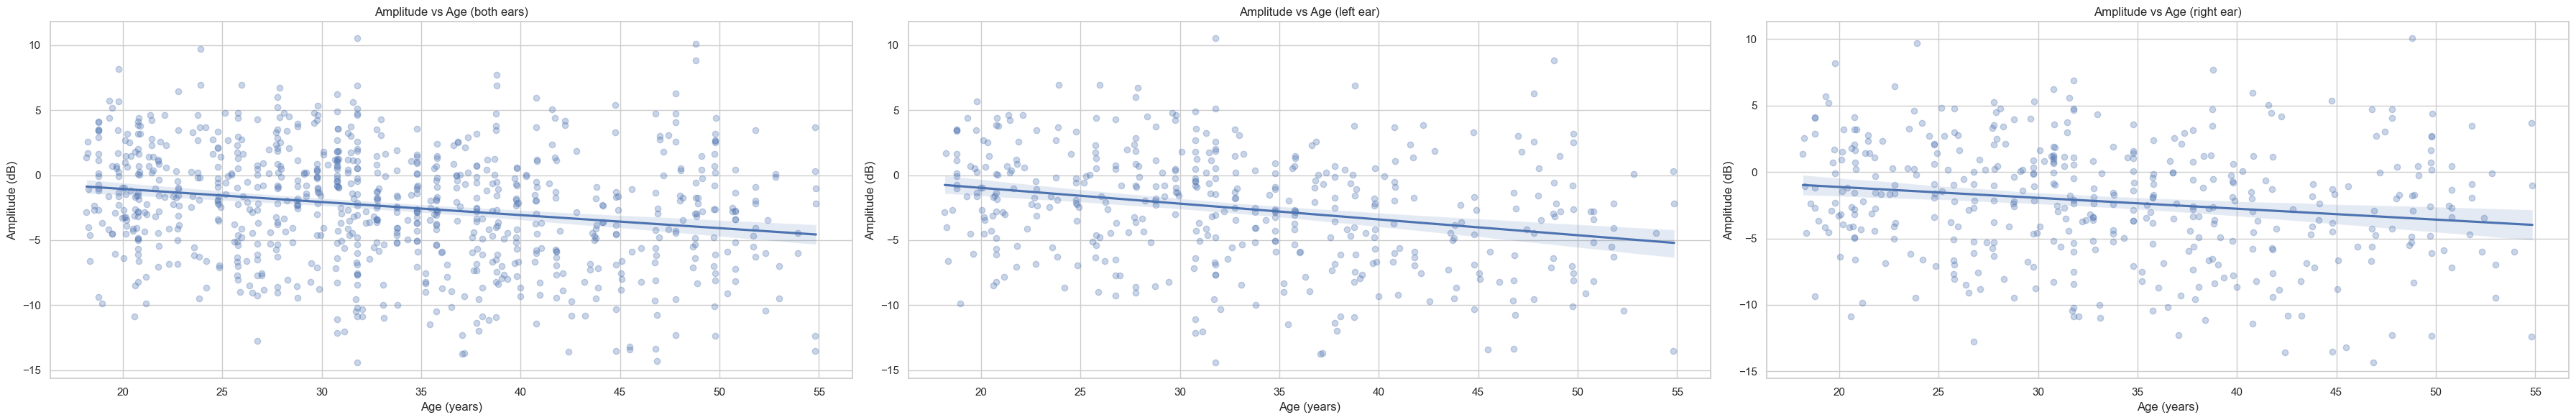

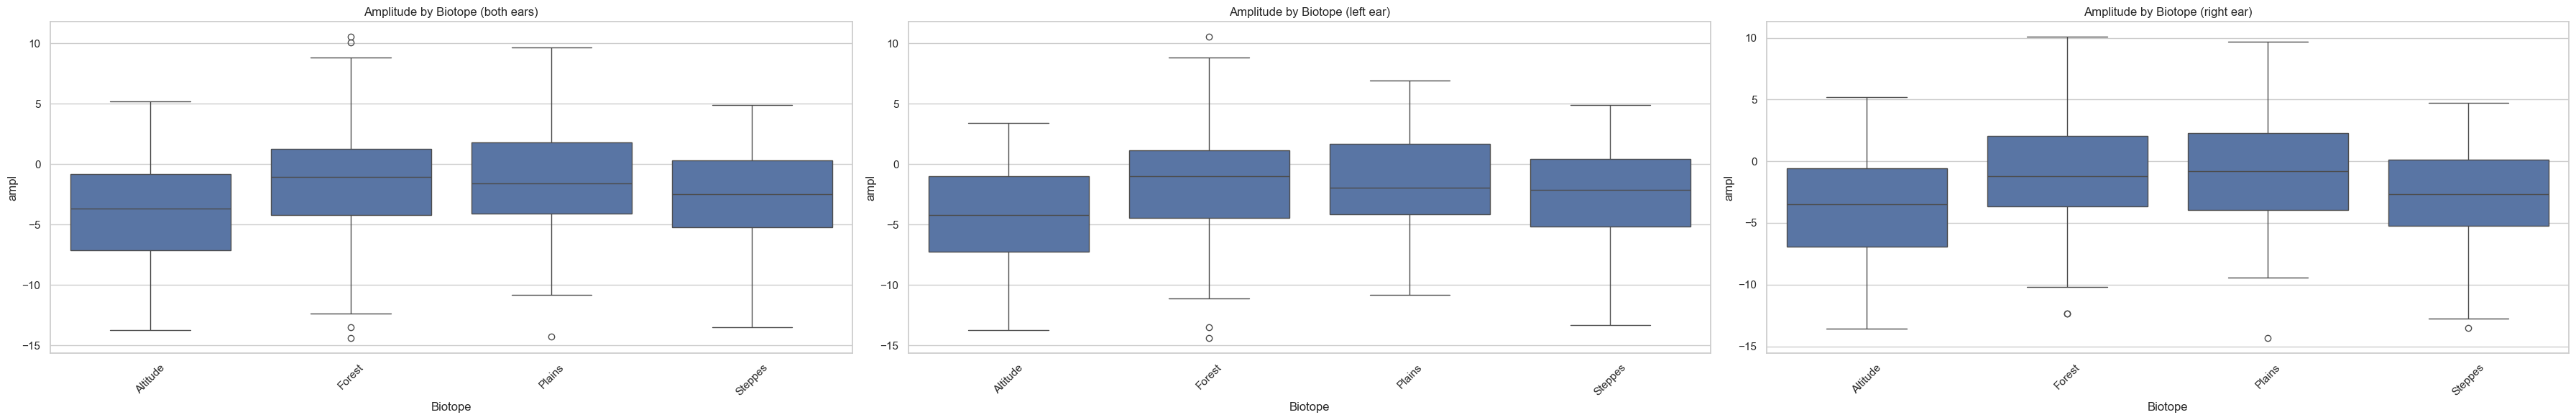

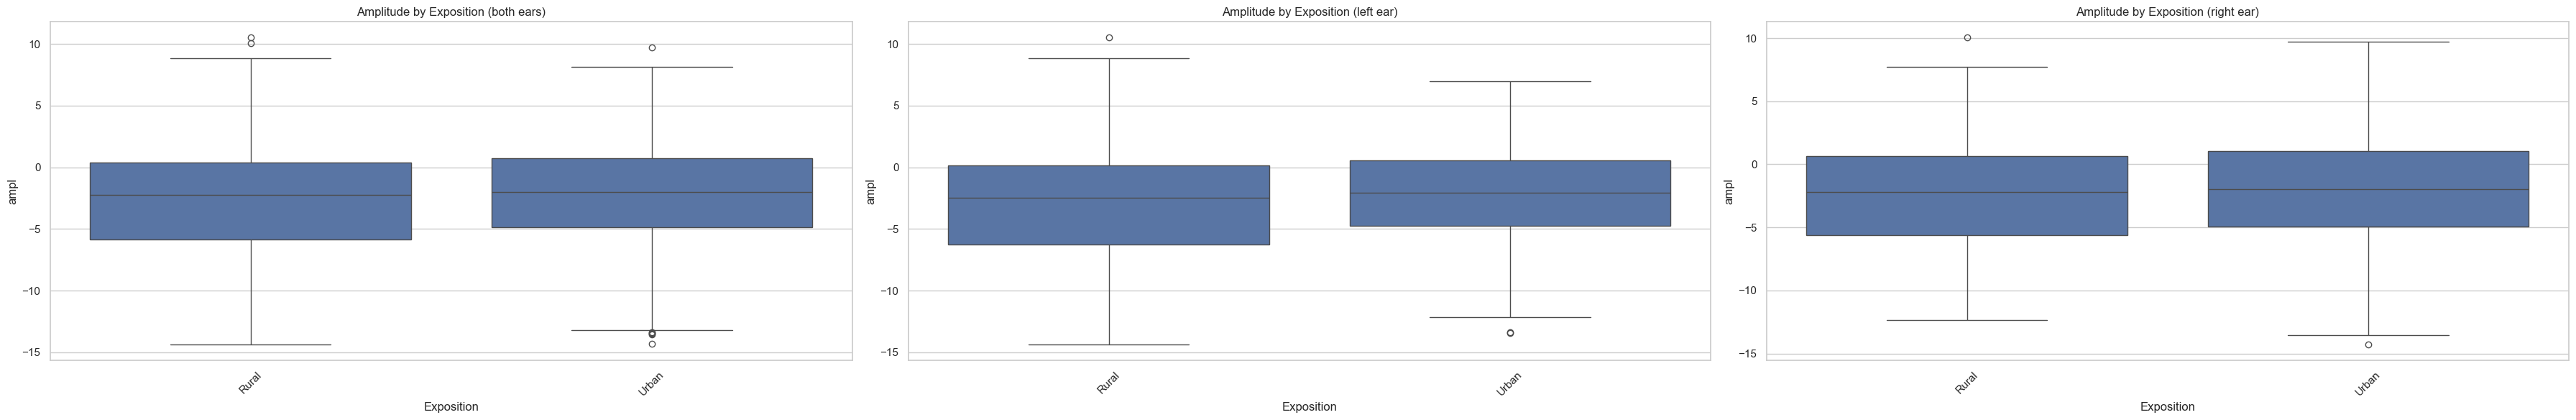

In [13]:
# Set style
sns.set(style="whitegrid")

# Plot amplitude distribution by sex and side
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='ampl', hue='side', data=data)
plt.title('Amplitude Distribution by Sex and Ear Side')
plt.ylabel('Amplitude (dB)')
plt.xlabel('Sex')
plt.show()

# Plot frequency maximum by age group
plt.figure(figsize=(36, 6))

plt.subplot(1, 3, 1)
sns.violinplot(x='age_group', y='f_max', hue='sex', data=data, split=True)
plt.title('Frequency Maximum by Age Group and Sex (both ears)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Age Group')

plt.subplot(1, 3, 2)
sns.violinplot(x='age_group', y='f_max', hue='sex', data=data_left, split=True)
plt.title('Frequency Maximum by Age Group and Sex (left ear)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Age Group')

plt.subplot(1, 3, 3)
sns.violinplot(x='age_group', y='f_max', hue='sex', data=data_right, split=True)
plt.title('Frequency Maximum by Age Group and Sex (right ear)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Age Group')

plt.tight_layout()
plt.show()

# Plot amplitude vs age with regression
plt.figure(figsize=(36, 6))

plt.subplot(1, 3, 1)
sns.regplot(x='age', y='ampl', data=data, scatter_kws={'alpha':0.3})
plt.title('Amplitude vs Age (both ears)')
plt.ylabel('Amplitude (dB)')
plt.xlabel('Age (years)')

plt.subplot(1, 3, 2)
sns.regplot(x='age', y='ampl', data=data_left, scatter_kws={'alpha':0.3})
plt.title('Amplitude vs Age (left ear)')
plt.ylabel('Amplitude (dB)')
plt.xlabel('Age (years)')

plt.subplot(1, 3, 3)
sns.regplot(x='age', y='ampl', data=data_right, scatter_kws={'alpha':0.3})
plt.title('Amplitude vs Age (right ear)')
plt.ylabel('Amplitude (dB)')
plt.xlabel('Age (years)')

plt.tight_layout()
plt.show()

# Plot environmental factors
plt.figure(figsize=(36, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Biotope', y='ampl', data=data)
plt.title('Amplitude by Biotope (both ears)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='Biotope', y='ampl', data=data_left)
plt.title('Amplitude by Biotope (left ear)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='Biotope', y='ampl', data=data_right)
plt.title('Amplitude by Biotope (right ear)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


plt.figure(figsize=(36, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Exposition', y='ampl', data=data)
plt.title('Amplitude by Exposition (both ears)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='Exposition', y='ampl', data=data_left)
plt.title('Amplitude by Exposition (left ear)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='Exposition', y='ampl', data=data_right)
plt.title('Amplitude by Exposition (right ear)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [14]:
# Model 1: Basic model with random intercept for individual
model1 = smf.mixedlm("ampl ~ sex + age + side", data, groups=data["ind"])
result1 = model1.fit()
print(result1.summary())

# Model 2: Adding environmental factors
model2 = smf.mixedlm("ampl ~ sex + age + side + Biotope + Exposition", data, groups=data["ind"])
result2 = model2.fit()
print(result2.summary())

# Model 3: Interaction between sex and age
model3 = smf.mixedlm("ampl ~ sex*age + side + Biotope + Exposition", data, groups=data["ind"])
result3 = model3.fit()
print(result3.summary())

# Model 4: Frequency-specific analysis
model4 = smf.mixedlm("mean_1000 ~ sex + age + side + Biotope + Exposition", data, groups=data["ind"])
result4 = model4.fit()
print(result4.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ampl      
No. Observations: 834     Method:             REML      
No. Groups:       448     Scale:              6.0577    
Min. group size:  1       Log-Likelihood:     -2269.4082
Max. group size:  2       Converged:          Yes       
Mean group size:  1.9                                   
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.729    0.683  2.531 0.011  0.390  3.068
sex[T.M]      -2.153    0.363 -5.926 0.000 -2.866 -1.441
side[T.R]      0.379    0.175  2.171 0.030  0.037  0.722
age           -0.103    0.019 -5.361 0.000 -0.140 -0.065
Group Var     11.270    0.592                           

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   ampl      
No. Observations:   834       Method:    

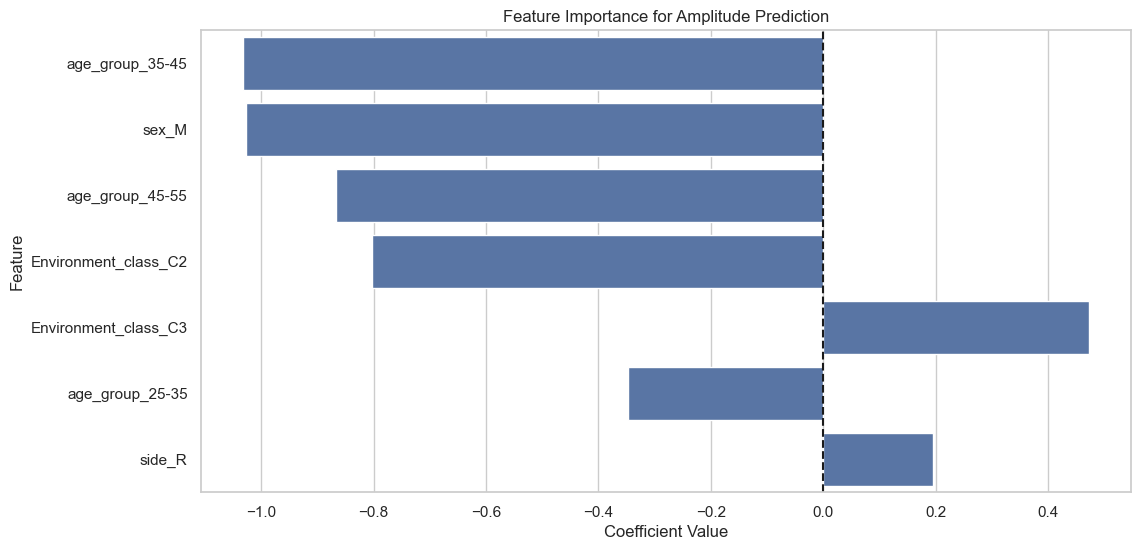

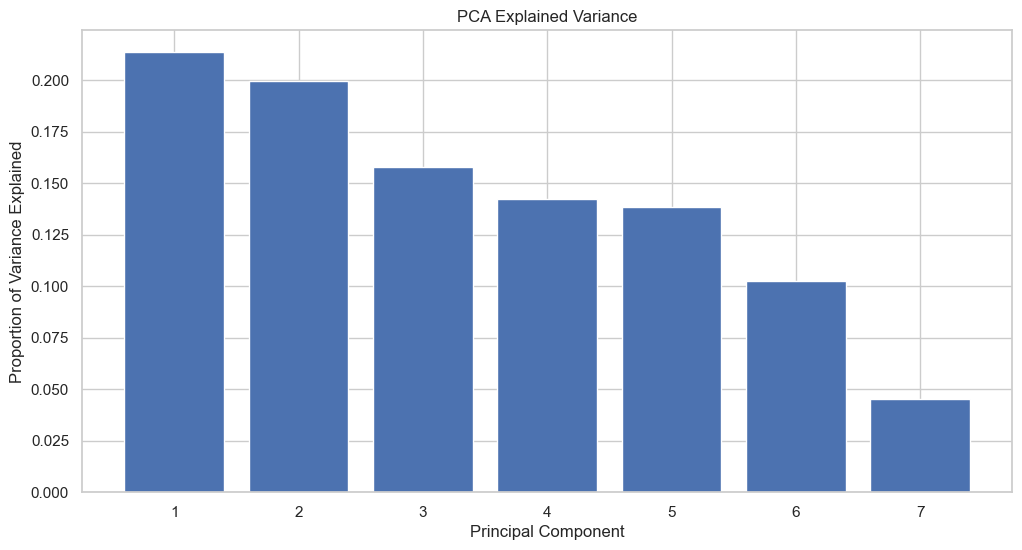

In [15]:
# Prepare data for feature importance analysis
X = data[['sex', 'age_group', 'side', 'Environment_class']]
X = pd.get_dummies(X, drop_first=True)
y = data['ampl']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear model
model = sm.OLS(y, sm.add_constant(X_scaled)).fit()

# Plot feature importance
coefs = pd.DataFrame({
    'feature': X.columns,
    'coef': model.params[1:],
    'abs_coef': np.abs(model.params[1:])
})

plt.figure(figsize=(12, 6))
sns.barplot(x='coef', y='feature', data=coefs.sort_values('abs_coef', ascending=False))
plt.title('Feature Importance for Amplitude Prediction')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='k', linestyle='--')
plt.show()

# PCA for dimensionality reduction
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.title('PCA Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

C:\Users\33681\AppData\Local\Temp\ipykernel_81972\3744984265.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  centroids = df.groupby(group_col)[['PC1', 'PC2']].mean().reset_index()
C:\Users\33681\AppData\Local\Temp\ipykernel_81972\3744984265.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  centroids = df.groupby(group_col)[['PC1', 'PC2']].mean().reset_index()


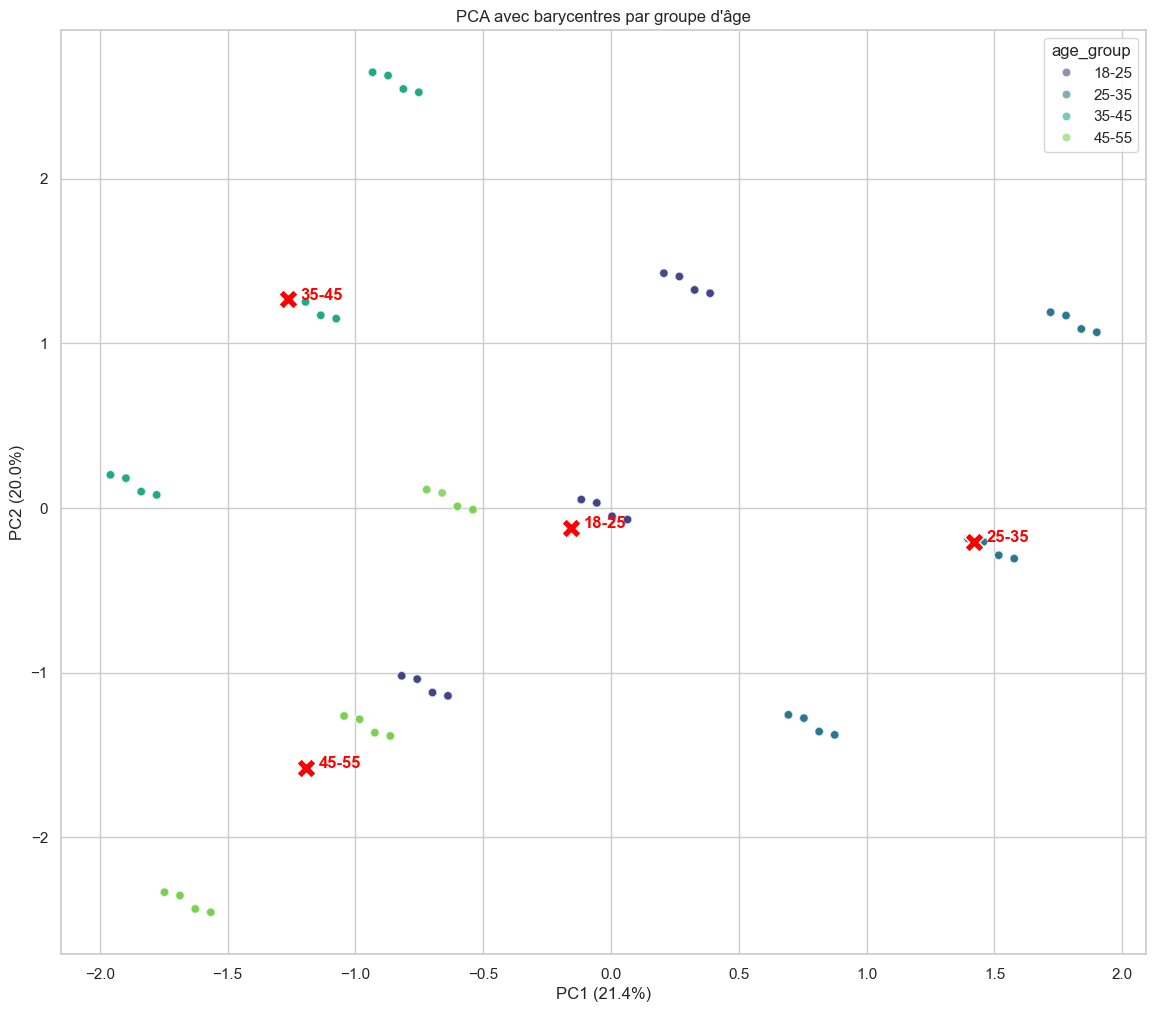

In [16]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)  # On se limite à 2 composantes principales pour la visualisation
X_pca = pca.fit_transform(X_scaled)

# Créer un DataFrame avec les résultats PCA et les variables de groupe
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, data[['age_group', 'sex', 'Environment_class']]], axis=1)

# Fonction pour calculer les barycentres
def calculate_centroids(df, group_col):
    centroids = df.groupby(group_col)[['PC1', 'PC2']].mean().reset_index()
    centroids.columns = [group_col, 'PC1_centroid', 'PC2_centroid']
    return centroids

# Calculer les barycentres pour chaque variable de groupe
age_centroids = calculate_centroids(pca_df, 'age_group')
sex_centroids = calculate_centroids(pca_df, 'sex')
Environment_class_centroids = calculate_centroids(pca_df, 'Environment_class')

# Visualisation avec barycentres
plt.figure(figsize=(14, 12))

# Choix d'une variable pour la couleur des points (par exemple 'age')
sns.scatterplot(x='PC1', y='PC2', hue='age_group', data=pca_df, alpha=0.6, palette='viridis')

# Ajouter les barycentres pour l'âge
sns.scatterplot(x='PC1_centroid', y='PC2_centroid', data=age_centroids, 
                s=200, marker='X', color='red', legend=False)

# Annoter les barycentres
for line in range(0, age_centroids.shape[0]):
    plt.text(age_centroids.PC1_centroid[line]+0.05, age_centroids.PC2_centroid[line], 
             age_centroids.age_group[line], horizontalalignment='left', 
             size='medium', color='red', weight='semibold')

plt.title('PCA avec barycentres par groupe d\'âge')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.show()

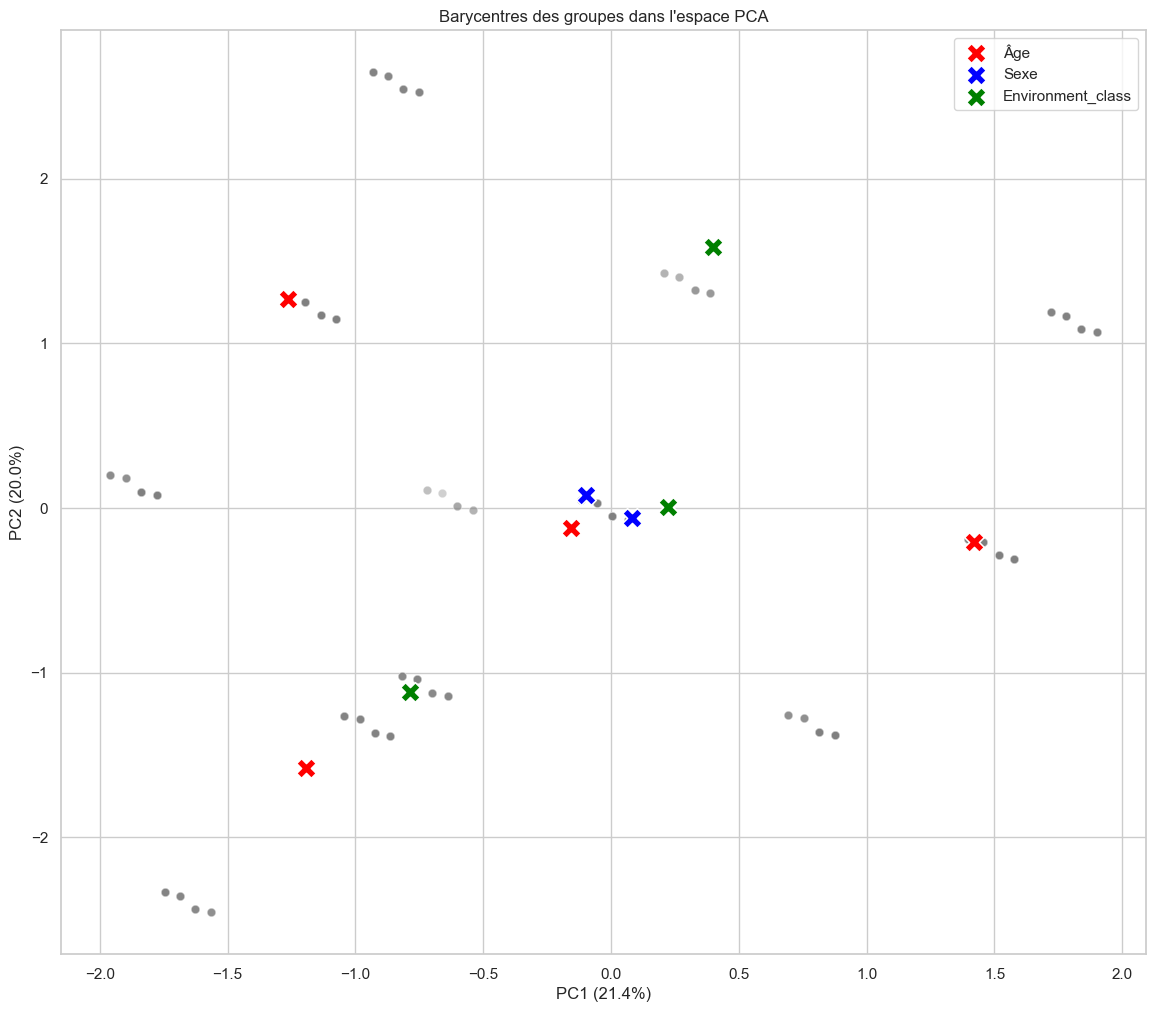

In [17]:
plt.figure(figsize=(14, 12))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.2, color='gray')

# Tracer tous les barycentres
groups = [age_centroids, sex_centroids, Environment_class_centroids]
colors = ['red', 'blue', 'green']
labels = ['Âge', 'Sexe', 'Environment_class']

for group, color, label in zip(groups, colors, labels):
    sns.scatterplot(x='PC1_centroid', y='PC2_centroid', data=group,
                    s=200, marker='X', color=color, label=label)
    
plt.title('Barycentres des groupes dans l\'espace PCA')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.legend()
plt.show()

-Ridgeline plots

c:\Users\33681\AppData\Local\Programs\Python\Python312\Lib\site-packages\joypy\joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 1200x600 with 0 Axes>

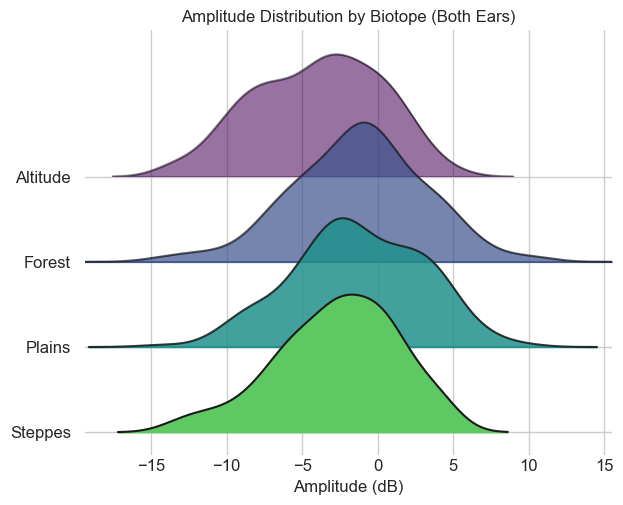

c:\Users\33681\AppData\Local\Programs\Python\Python312\Lib\site-packages\joypy\joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 1200x600 with 0 Axes>

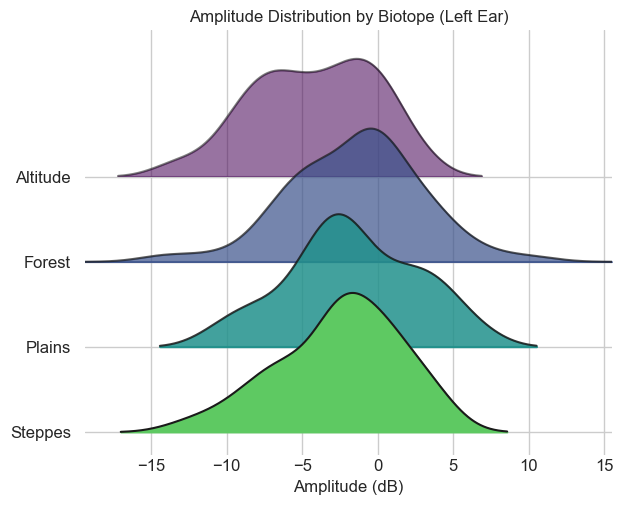

c:\Users\33681\AppData\Local\Programs\Python\Python312\Lib\site-packages\joypy\joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 1200x600 with 0 Axes>

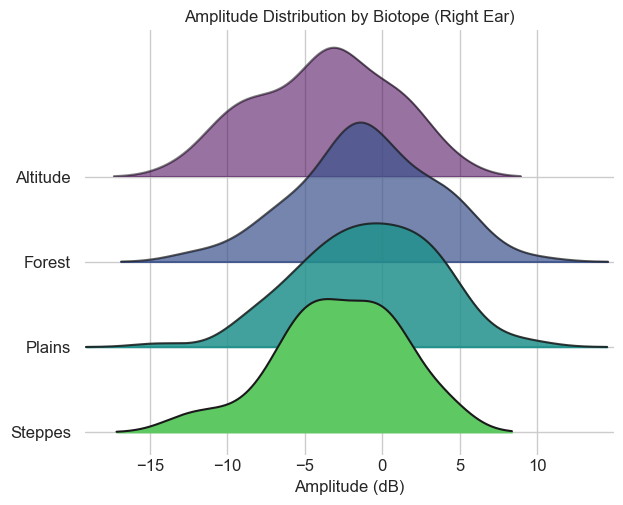

<Figure size 1200x600 with 0 Axes>

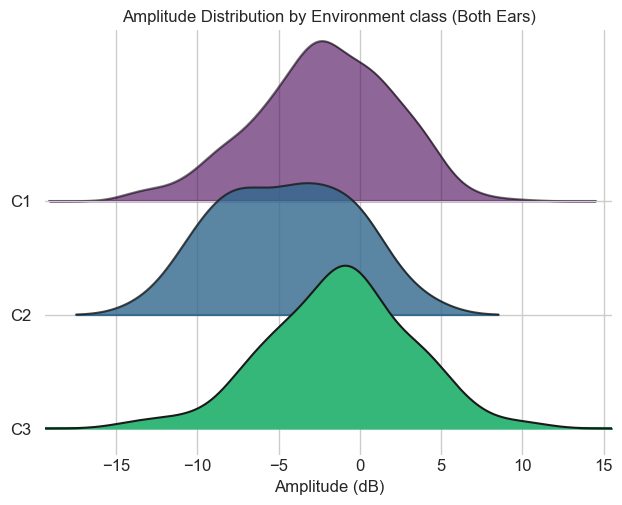

<Figure size 1200x600 with 0 Axes>

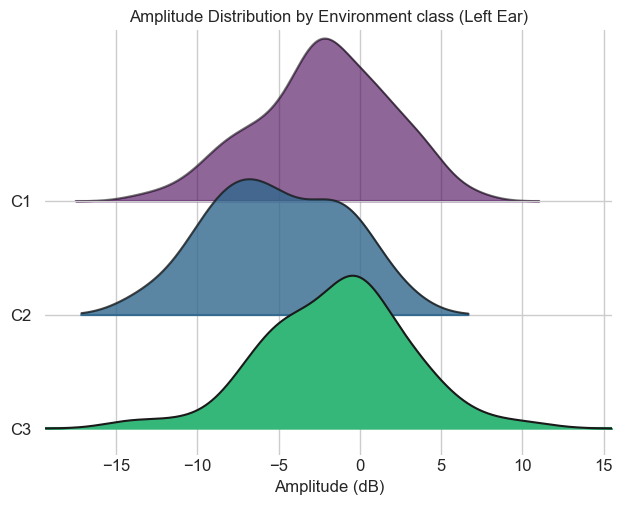

<Figure size 1200x600 with 0 Axes>

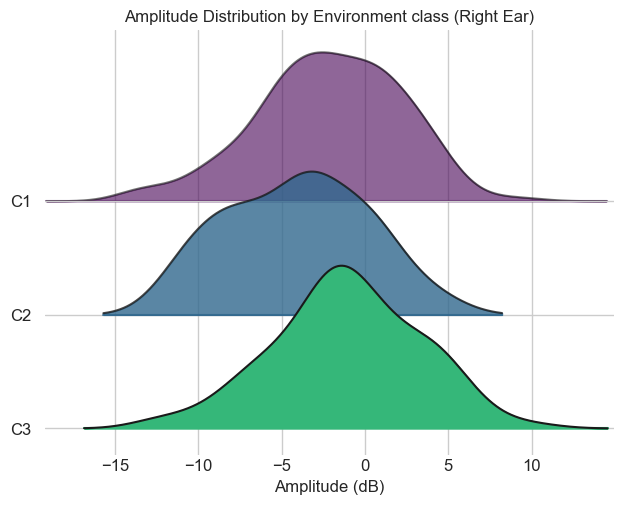

c:\Users\33681\AppData\Local\Programs\Python\Python312\Lib\site-packages\joypy\joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 1200x600 with 0 Axes>

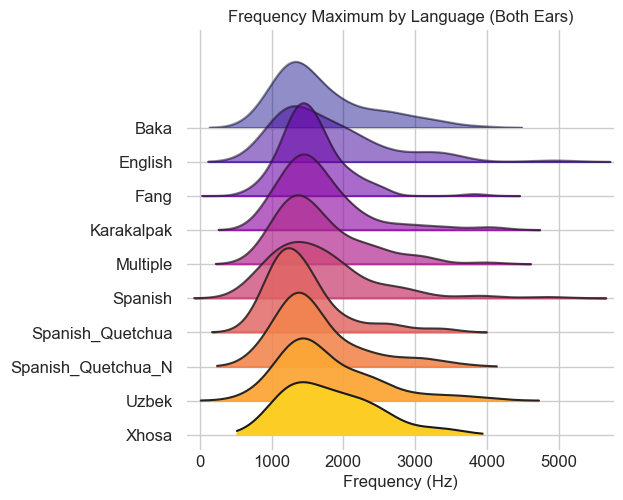

c:\Users\33681\AppData\Local\Programs\Python\Python312\Lib\site-packages\joypy\joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 1200x600 with 0 Axes>

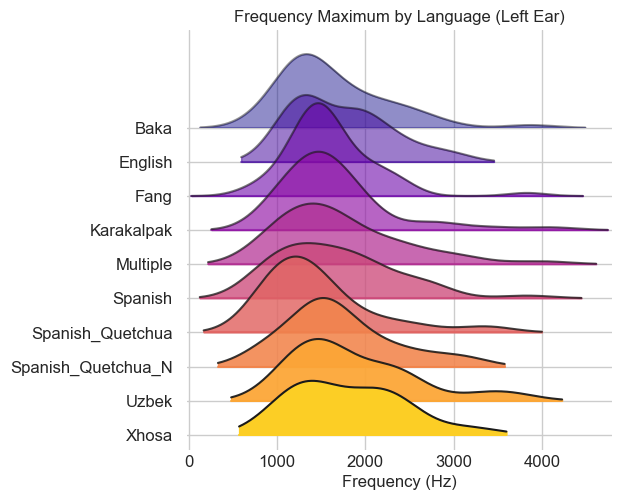

c:\Users\33681\AppData\Local\Programs\Python\Python312\Lib\site-packages\joypy\joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 1200x600 with 0 Axes>

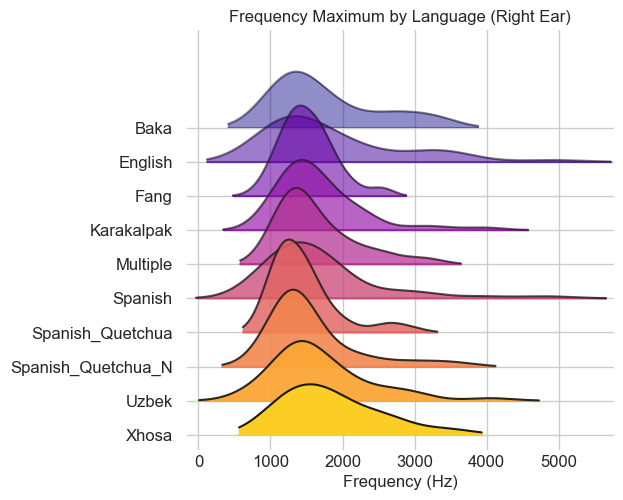

In [18]:
# --- (1) Amplitude by Biotope ---
plt.figure(figsize=(12, 6))
joyplot(data, by="Biotope", column="ampl", 
        range_style='own', grid=True, 
        fade=True, colormap=plt.cm.viridis)
plt.title("Amplitude Distribution by Biotope (Both Ears)")
plt.xlabel("Amplitude (dB)")
plt.show()

plt.figure(figsize=(12, 6))
joyplot(data_left, by="Biotope", column="ampl", 
        range_style='own', grid=True, 
        fade=True, colormap=plt.cm.viridis)
plt.title("Amplitude Distribution by Biotope (Left Ear)")
plt.xlabel("Amplitude (dB)")
plt.show()

plt.figure(figsize=(12, 6))
joyplot(data_right, by="Biotope", column="ampl", 
        range_style='own', grid=True, 
        fade=True, colormap=plt.cm.viridis)
plt.title("Amplitude Distribution by Biotope (Right Ear)")
plt.xlabel("Amplitude (dB)")
plt.show()

# --- (2) Amplitude by Environment_class ---
plt.figure(figsize=(12, 6))
joyplot(data, by="Environment_class", column="ampl", 
        range_style='own', grid=True, 
        fade=True, colormap=plt.cm.viridis)
plt.title("Amplitude Distribution by Environment class (Both Ears)")
plt.xlabel("Amplitude (dB)")
plt.show()

plt.figure(figsize=(12, 6))
joyplot(data_left, by="Environment_class", column="ampl", 
        range_style='own', grid=True, 
        fade=True, colormap=plt.cm.viridis)
plt.title("Amplitude Distribution by Environment class (Left Ear)")
plt.xlabel("Amplitude (dB)")
plt.show()

plt.figure(figsize=(12, 6))
joyplot(data_right, by="Environment_class", column="ampl", 
        range_style='own', grid=True, 
        fade=True, colormap=plt.cm.viridis)
plt.title("Amplitude Distribution by Environment class (Right Ear)")
plt.xlabel("Amplitude (dB)")
plt.show()

# --- (3) Frequency Max by Language ---
plt.figure(figsize=(12, 6))
joyplot(data, by="Language", column="f_max", 
        range_style='own', grid=True, 
        fade=True, colormap=plt.cm.plasma)
plt.title("Frequency Maximum by Language (Both Ears)")
plt.xlabel("Frequency (Hz)")
plt.show()

plt.figure(figsize=(12, 6))
joyplot(data_left, by="Language", column="f_max", 
        range_style='own', grid=True, 
        fade=True, colormap=plt.cm.plasma)
plt.title("Frequency Maximum by Language (Left Ear)")
plt.xlabel("Frequency (Hz)")
plt.show()

plt.figure(figsize=(12, 6))
joyplot(data_right, by="Language", column="f_max", 
        range_style='own', grid=True, 
        fade=True, colormap=plt.cm.plasma)
plt.title("Frequency Maximum by Language (Right Ear)")
plt.xlabel("Frequency (Hz)")
plt.show()

- Heatmaps.

C:\Users\33681\AppData\Local\Temp\ipykernel_81972\208555124.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_impact = data.groupby(env_factors)['ampl'].mean().unstack()


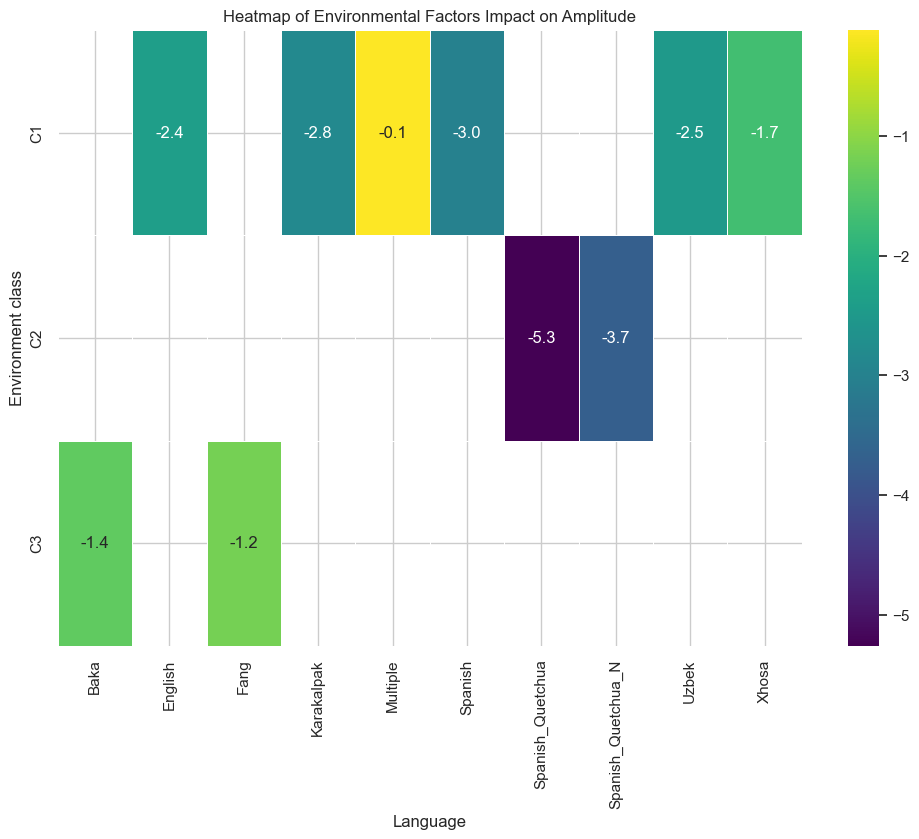

C:\Users\33681\AppData\Local\Temp\ipykernel_81972\208555124.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_impact = data.groupby(env_factors)['plat_amp'].mean().unstack()


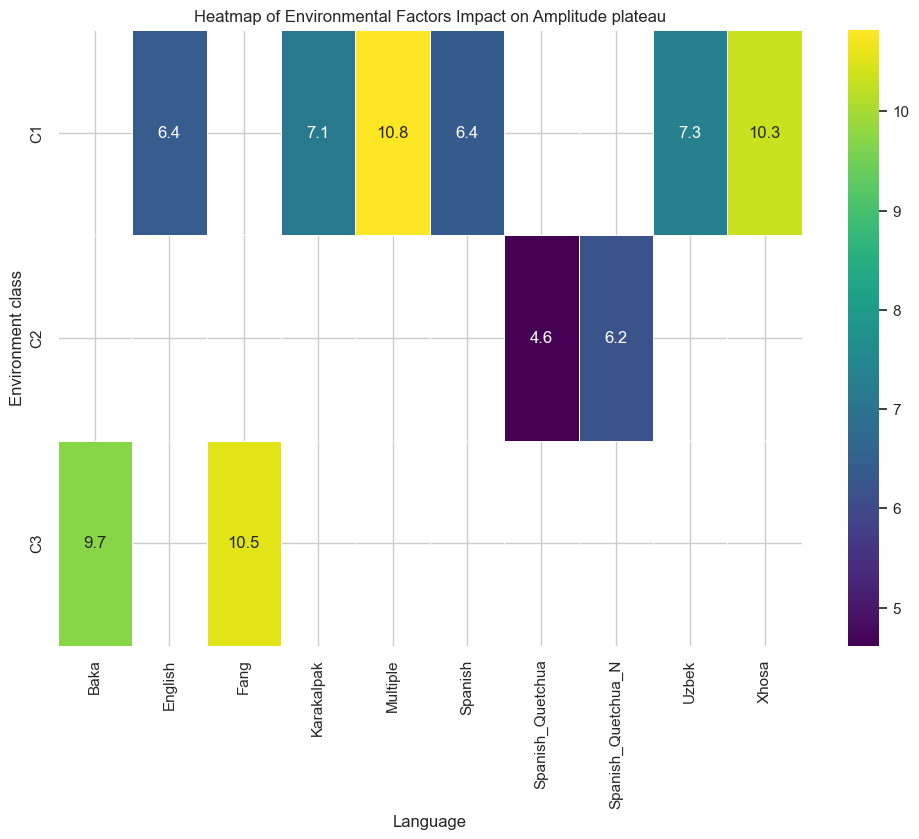

C:\Users\33681\AppData\Local\Temp\ipykernel_81972\208555124.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_impact = data.groupby(env_factors)['plat_start'].mean().unstack()


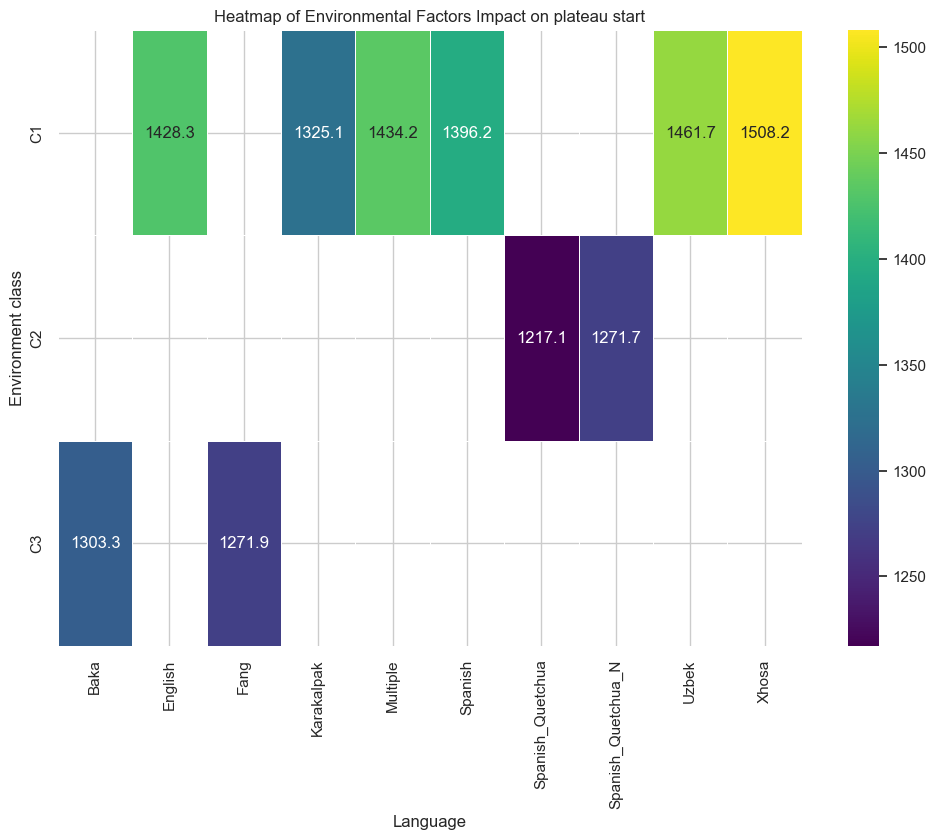

C:\Users\33681\AppData\Local\Temp\ipykernel_81972\208555124.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_impact = data.groupby(env_factors)['plat_end'].mean().unstack()


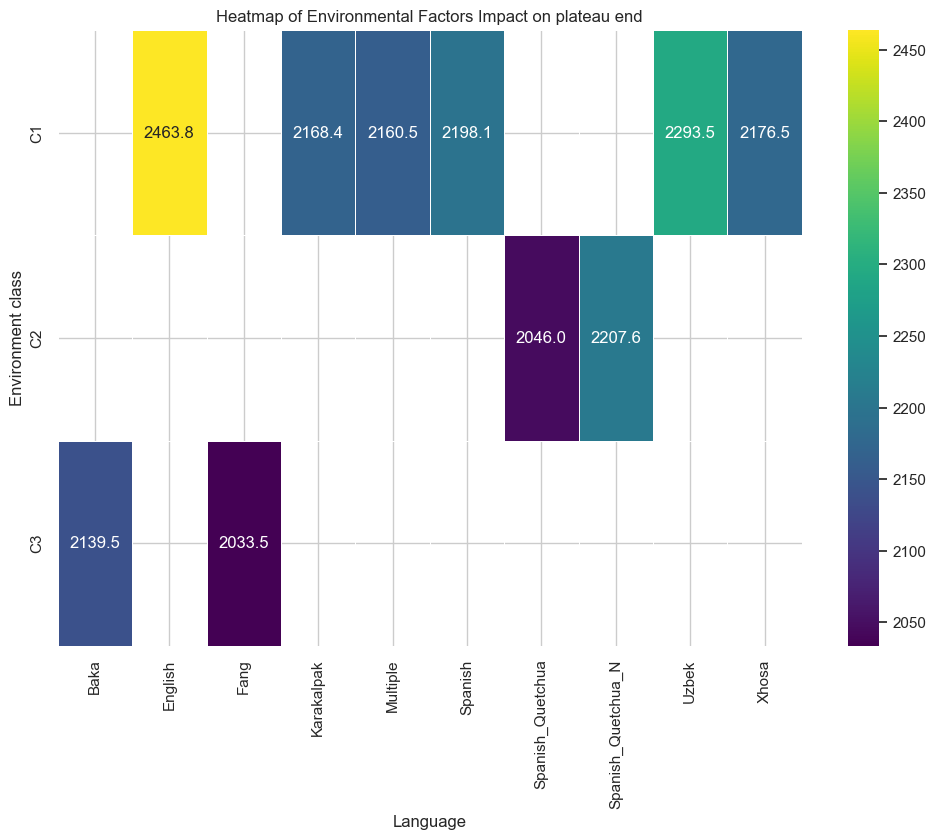

C:\Users\33681\AppData\Local\Temp\ipykernel_81972\208555124.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_impact = data.groupby(env_factors)['plat_med'].mean().unstack()


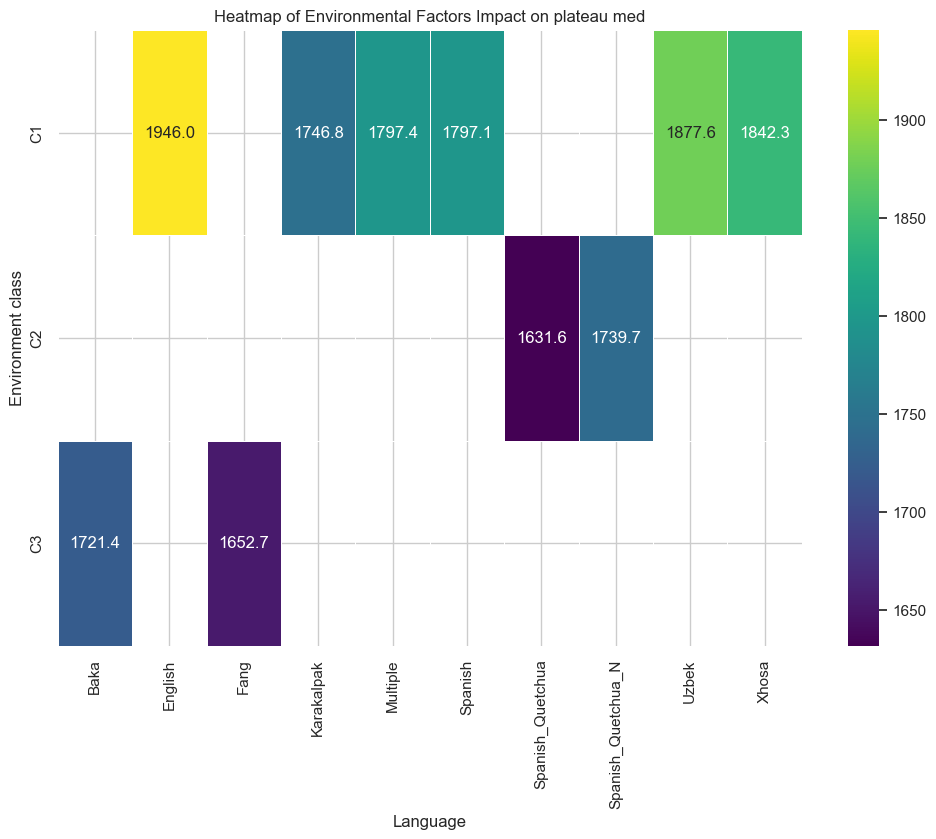

In [19]:
# Heatmap of environmental effects
env_factors = ['Environment_class', 'Language']
env_impact = data.groupby(env_factors)['ampl'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(env_impact, cmap="viridis", annot=True, 
           fmt=".1f", linewidths=.5)
plt.title("Heatmap of Environmental Factors Impact on Amplitude")
plt.ylabel("Environment class")
plt.xlabel("Language")
plt.show()


# Heatmap of environmental effects
env_factors = ['Environment_class', 'Language']
env_impact = data.groupby(env_factors)['plat_amp'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(env_impact, cmap="viridis", annot=True, 
           fmt=".1f", linewidths=.5)
plt.title("Heatmap of Environmental Factors Impact on Amplitude plateau")
plt.ylabel("Environment class")
plt.xlabel("Language")
plt.show()


# Heatmap of environmental effects
env_factors = ['Environment_class', 'Language']
env_impact = data.groupby(env_factors)['plat_start'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(env_impact, cmap="viridis", annot=True, 
           fmt=".1f", linewidths=.5)
plt.title("Heatmap of Environmental Factors Impact on plateau start")
plt.ylabel("Environment class")
plt.xlabel("Language")
plt.show()


# Heatmap of environmental effects
env_factors = ['Environment_class', 'Language']
env_impact = data.groupby(env_factors)['plat_end'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(env_impact, cmap="viridis", annot=True, 
           fmt=".1f", linewidths=.5)
plt.title("Heatmap of Environmental Factors Impact on plateau end")
plt.ylabel("Environment class")
plt.xlabel("Language")
plt.show()


# Heatmap of environmental effects
env_factors = ['Environment_class', 'Language']
env_impact = data.groupby(env_factors)['plat_med'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(env_impact, cmap="viridis", annot=True, 
           fmt=".1f", linewidths=.5)
plt.title("Heatmap of Environmental Factors Impact on plateau med")
plt.ylabel("Environment class")
plt.xlabel("Language")
plt.show()

## Mixed model

In [20]:
data = data.rename(columns={'plat_amp': 'Amp_avg_allspec', 'ampl': 'Ampl_plat'})
""" data['Environment'] = data['environment_exposition'].astype(str) + ' - ' + data['environment_biotope'].astype(str)

# missing_values = data.isnull().sum()
# columns_with_missing_values = missing_values[missing_values > 0].index """
data = data.dropna(subset=['environment_exposition'])

def run_anova_models(df, factor_var, dv_list):
    results = []
    for dv in dv_list:
        formula = f"{dv} ~ {factor_var} + age + sex + side"
        model = ols(formula, data=df).fit()
        anova_table = anova_lm(model, typ=1)
        
        res = {
            'Endogenous': dv,
            f'{factor_var}_F': anova_table.loc[factor_var, 'F'],
            f'{factor_var}_p': anova_table.loc[factor_var, 'PR(>F)'],
            'Age_F': anova_table.loc['age', 'F'],
            'Age_p': anova_table.loc['age', 'PR(>F)'],
            'Sex_F': anova_table.loc['sex', 'F'],
            'Sex_p': anova_table.loc['sex', 'PR(>F)'],
            'Ear_side_F': anova_table.loc['side', 'F'],
            'Ear_side_p': anova_table.loc['side', 'PR(>F)']
        }
        results.append(res)
    
    return pd.DataFrame(results)

dependent_vars = [
    'Amp_avg_allspec', 'Ampl_plat', 'f_max', 
    'plat_start', 'plat_end', 'plat_med'
] # , 'Freq_plat_width'   à ajouter mais jsp ce que c'est

population_results = run_anova_models(data, 'Population', dependent_vars)
environment_results = run_anova_models(data, 'Environment_class', dependent_vars)
language_results = run_anova_models(data, 'Language', dependent_vars) # ['age', 'sex', 'side'])

def format_results(results_df, model_name):
    print(f"\n{model_name} model")
    print("{:<15} {:<16} {:<16} {:<16} {:<16}".format(
        "", f"{model_name}", "Age", "Sex", "Ear_side"))
    print("{:<15} {:<8} {:<8} {:<8} {:<8} {:<8} {:<8} {:<8} {:<8}".format(
        "", "F-val", "p-val", "F-val", "p-val", "F-val", "p-val", "F-val", "p-val"))
    
    for _, row in results_df.iterrows():
        print("{:<15} {:<8.2f} {:<8.2f} {:<8.2f} {:<8.2f} {:<8.2f} {:<8.2f} {:<8.2f} {:<8.2f}".format(
            row['Endogenous'],
            row[f'{model_name}_F'], row[f'{model_name}_p'],
            row['Age_F'], row['Age_p'],
            row['Sex_F'], row['Sex_p'],
            row['Ear_side_F'], row['Ear_side_p']
        ))

# Affichage des résultats
format_results(population_results, "Population")
format_results(environment_results, "Environment_class")
format_results(language_results, "Language")


Population model
                Population       Age              Sex              Ear_side        
                F-val    p-val    F-val    p-val    F-val    p-val    F-val    p-val   
Amp_avg_allspec 10.23    0.00     17.27    0.00     31.38    0.00     0.81     0.37    
Ampl_plat       4.95     0.00     41.21    0.00     53.65    0.00     0.26     0.61    
f_max           0.77     0.62     1.01     0.31     0.27     0.60     0.19     0.66    
plat_start      1.23     0.29     0.03     0.86     0.19     0.66     2.20     0.14    
plat_end        2.07     0.05     0.13     0.72     0.01     0.93     1.74     0.19    
plat_med        1.64     0.12     0.02     0.89     0.07     0.79     2.42     0.12    

Environment_class model
                Environment_class Age              Sex              Ear_side        
                F-val    p-val    F-val    p-val    F-val    p-val    F-val    p-val   
Amp_avg_allspec 7.78     0.01     17.72    0.00     31.40    0.00     0.80     0.37 